In [ ]:
### import pandas as pd
import os
import numpy as np
import seaborn as sns
import missingno as msno
import warnings
from scipy import stats
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell
import warnings
warnings.filterwarnings('ignore')


**CARDIO_BASE**

In [29]:
T = pd.read_csv ('cardio_base.csv')

In [30]:
T

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1
69996,99995,22601,1,158,126.0,140,90,2,0
69997,99996,19066,2,183,105.0,180,90,3,0
69998,99998,22431,1,163,72.0,135,80,1,0


In [7]:
T. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   smoke        70000 non-null  int64  
dtypes: float64(1), int64(8)
memory usage: 4.8 MB


In [31]:
T['ageY'] = (T['age'] / 365).round().astype('int')

In [10]:
T['ageY'] 

0        50
1        55
2        52
3        48
4        48
         ..
69995    53
69996    62
69997    52
69998    61
69999    56
Name: ageY, Length: 70000, dtype: int32

T

In [ ]:
#move column ageY after age

In [32]:
move_column = T.pop('ageY')

In [33]:
T.insert(2, 'ageY', move_column)

In [34]:
T

,id,age,ageY,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,50,2,168,62.0,110,80,1,0
1,1,20228,55,1,156,85.0,140,90,3,0
2,2,18857,52,1,165,64.0,130,70,3,0
3,3,17623,48,2,169,82.0,150,100,1,0
4,4,17474,48,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,53,2,168,76.0,120,80,1,1
69996,99995,22601,62,1,158,126.0,140,90,2,0
69997,99996,19066,52,2,183,105.0,180,90,3,0
69998,99998,22431,61,1,163,72.0,135,80,1,0


In [ ]:
##How much heavier is the age group with the higest average weight than the age group with the lowest weight 

In [121]:
A = T.groupby ('ageY') ['weight'].mean() #or  T.groupby (['ageY']) [['weight']].mean()
A

ageY
30    67.250000
39    73.633985
40    71.452852
41    72.883812
42    72.074009
43    73.456522
44    73.483468
45    74.083223
46    73.481083
47    74.029443
48    74.597079
49    73.549008
50    73.577710
51    74.145957
52    74.296832
53    74.043781
54    74.308550
55    74.684646
56    74.843565
57    74.206956
58    74.957103
59    75.171734
60    74.677918
61    75.082637
62    74.779272
63    74.840551
64    75.412500
65    73.512784
Name: weight, dtype: float64

In [136]:
Wt_diff = A.max()- A.min() 
Wt_diff

8.162499999999994

In [137]:
(Wt_diff/A.min()) * 100

12.13754646840148

**OR**

In [141]:
 (A.max()/A.min()- 1)* 100
    

12.137546468401483

**Do people over 50 have a higer cholesterol than others**

In [183]:
B1=T[T['ageY']>50] ['cholesterol'].mean()
B1

1.429562456506611

In [184]:
B2=T[T['ageY']<50] ['cholesterol'].mean()
B2

1.2336657955090937

**OR**

In [185]:
B = T.groupby (['ageY']) [['cholesterol']].mean() 
B

,cholesterol
ageY,
30,1.000000
39,1.205379
40,1.170000
41,1.219321
42,1.187500
43,1.313043
44,1.221361
45,1.265522
46,1.239255


In [171]:
B2 = B[B.index > 50].mean()
B2

cholesterol    1.434995
dtype: float64

In [172]:
B3 =B[B.index < 50].mean()
B3

cholesterol    1.2247
dtype: float64

In [188]:
B2 - B3

cholesterol    0.008966
dtype: float64

In [189]:
B2/B3 -1

cholesterol    0.007321
dtype: float64

In [ ]:
#No they do not, they are about the same chloesterol level 

**ARE MEN LIKELY MORE SMOKERS THAN WOMEN**

In [192]:
C = T.groupby (['gender']) [['smoke']].sum() 
C

,smoke
gender,
1,813
2,5356


In [220]:
Z = T[T['smoke'] ==1]
Z

,id,age,ageY,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
14,23,14532,40,2,181,95.0,130,90,1,1
19,29,21755,60,2,162,56.0,120,70,1,1
38,52,23388,64,2,162,72.0,130,80,1,1
58,73,15901,44,2,172,84.0,140,90,1,1
59,74,20431,56,1,164,64.0,180,90,1,1
...,...,...,...,...,...,...,...,...,...,...
69950,99933,19137,52,2,167,74.0,130,80,1,1
69953,99936,17373,48,2,173,69.0,110,70,1,1
69957,99941,15536,43,2,166,90.0,120,80,1,1
69970,99958,22572,62,2,173,103.0,140,80,3,1


In [224]:
5356/813

6.587945879458794

In [ ]:
#women are likely 6x more smokers than men

**HOW TALL ARE THE TALLEST 1% OF PEOPLE**

In [225]:
T['height'].quantile(0.99)

184.0

In [228]:
T['height'].max()

250

**OR**

In [234]:
z = T.sort_values(by='height', ascending = False)
z

,id,age,ageY,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
6486,9223,21220,58,1,250,86.0,140,100,3,0
21628,30894,19054,52,2,207,78.0,100,70,1,0
41901,59847,19187,53,2,200,100.0,170,1100,2,0
8897,12687,22497,62,2,198,79.0,160,100,1,1
30127,43083,23274,64,1,198,85.0,110,90,1,0
...,...,...,...,...,...,...,...,...,...,...
27603,39462,20978,57,1,64,61.0,130,70,1,0
29157,41661,19088,52,1,60,69.0,110,70,1,0
64115,91523,18426,50,1,59,57.6,125,67,1,0
66643,95141,18830,52,1,57,61.0,130,90,1,0


In [252]:
Tp700 =z.head(700) #1% of tallest people
Tp700

,id,age,ageY,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
6486,9223,21220,58,1,250,86.0,140,100,3,0
21628,30894,19054,52,2,207,78.0,100,70,1,0
41901,59847,19187,53,2,200,100.0,170,1100,2,0
8897,12687,22497,62,2,198,79.0,160,100,1,1
30127,43083,23274,64,1,198,85.0,110,90,1,0
...,...,...,...,...,...,...,...,...,...,...
21182,30263,21972,60,2,184,75.0,140,90,1,0
59359,84757,23395,64,2,184,90.0,120,80,3,1
37162,53093,15969,44,1,184,80.0,130,80,1,0
69375,99097,20700,57,2,184,84.0,120,95,1,0


In [253]:
Z = pd.DataFrame(Tp700, columns = (['id','height']))
Z

,id,height
6486,9223,250
21628,30894,207
41901,59847,200
8897,12687,198
30127,43083,198
...,...,...
21182,30263,184
59359,84757,184
37162,53093,184
69375,99097,184


In [254]:
Z.height.mean()

186.9142857142857

In [ ]:
#based on my two diff methods i had 184 and 187 as the 1% of the tallest peoples height which is close

**WHICH 2 FEATURES HAVE THE HIGEST SPEARMAN RANK CORRELATION**

In [299]:
new_T = T.corr(method = 'spearman')
new_T

,id,age,ageY,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,1.000000,0.002682,0.002399,0.003506,-0.001886,-0.001292,0.003258,-0.000238,0.005706,-0.003697
age,0.002682,1.000000,0.998048,-0.020176,-0.082292,0.061559,0.219087,0.156700,0.140113,-0.047471
ageY,0.002399,0.998048,1.000000,-0.020697,-0.083634,0.062979,0.220780,0.157957,0.141935,-0.047535
gender,0.003506,-0.020176,-0.020697,1.000000,0.533805,0.172480,0.063174,0.066374,-0.035730,0.338135
height,-0.001886,-0.082292,-0.083634,0.533805,1.000000,0.313569,0.019381,0.030534,-0.058940,0.197632
weight,-0.001292,0.061559,0.062979,0.172480,0.313569,1.000000,0.277749,0.254420,0.137908,0.071676
ap_hi,0.003258,0.219087,0.220780,0.063174,0.019381,0.277749,1.000000,0.735436,0.208722,0.028929
ap_lo,-0.000238,0.156700,0.157957,0.066374,0.030534,0.254420,0.735436,1.000000,0.167401,0.026172
cholesterol,0.005706,0.140113,0.141935,-0.035730,-0.058940,0.137908,0.208722,0.167401,1.000000,0.015220
smoke,-0.003697,-0.047471,-0.047535,0.338135,0.197632,0.071676,0.028929,0.026172,0.015220,1.000000


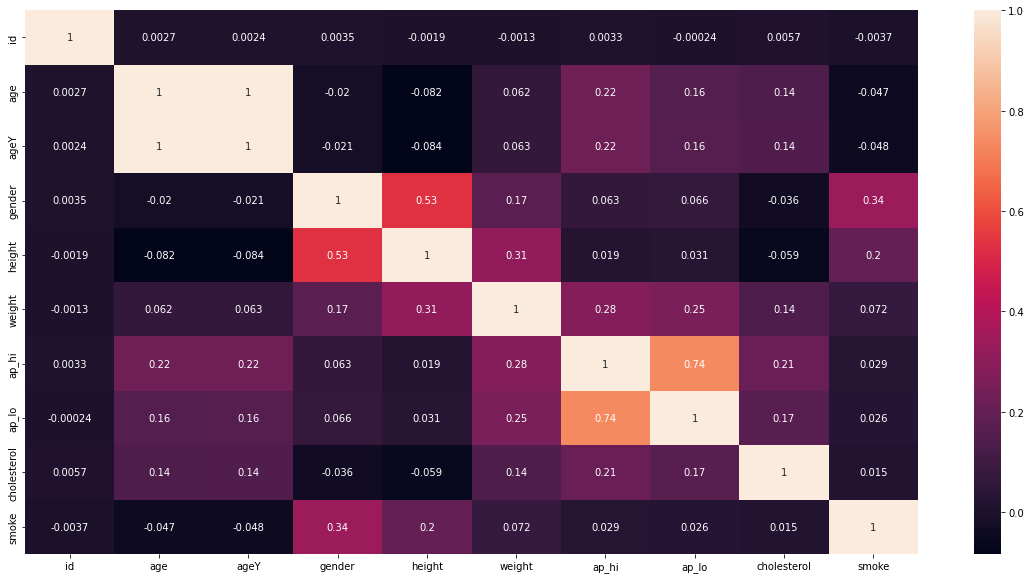

In [255]:
plt.figure(figsize =(20,10))
corr = T.corr(method = 'spearman')
sns.heatmap(corr,annot = True)
plt.show()

In [ ]:
#The pair with the highest spearman rank is Ap_hi and ap_lo  with 0.74 , ignore the 1 or 0.99 around age and agey 
#that cause i should have removed age column after the convertion while cleaning..

**What percentage of people are more than 2 std dev far from the ave height**

In [257]:
AveH= T.height.mean()
AveH 

164.35922857142856

In [258]:
std_H = T.height.std()
std_H

8.210126364538139

In [261]:
#calc the cutoff for being 2 standard dev away from the mean (more dan 2 std from ave height = 2*std_H)

Cutoff_H = AveH + 2 * std_H
Cutoff_H

180.77948130050484

In [263]:
#count no of people with height 2 standard dev away from the mean

Numofoutlier = len(T[T.height  > Cutoff_H])
Numofoutlier

1439

In [266]:
per_outliers = 100 * (Numofoutlier / len(T))
per_outliers

2.0557142857142856

**ALCO**

In [280]:
T2 = pd.read_csv ('cardio_alco.csv')

In [268]:
T2

,id;alco
0,44;0
1,45;0
2,46;0
3,47;0
4,49;0
...,...
56898,99949;0
56899,99950;0
56900,99951;0
56901,99952;0


**OR this way to sperate it with out too many coding**

In [270]:
T2 = pd.read_csv ('cardio_alco.csv', sep = ';')
T2

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0
...,...,...
56898,99949,0
56899,99950,0
56900,99951,0
56901,99952,0


In [ ]:
# continuing with the first one, you can also continue to split like this

In [281]:
T2[['id', 'alco']] = T2['id;alco']. str.split(';' , expand =True)

In [282]:
T2

,id;alco,id,alco
0,44;0,44,0
1,45;0,45,0
2,46;0,46,0
3,47;0,47,0
4,49;0,49,0
...,...,...,...
56898,99949;0,99949,0
56899,99950;0,99950,0
56900,99951;0,99951,0
56901,99952;0,99952,0


In [283]:
T2.drop(['id;alco'], axis = 1, inplace = True)
T2

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0
...,...,...
56898,99949,0
56899,99950,0
56900,99951,0
56901,99952,0


In [288]:
T2. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      56903 non-null  object
 1   alco    56903 non-null  object
dtypes: object(2)
memory usage: 889.2+ KB


In [290]:
T2['id'] = pd.to_numeric (T2['id'])
T2['alco'] = pd.to_numeric (T2['alco'])
T2

,id,alco
0,44,0
1,45,0
2,46,0
3,47,0
4,49,0
...,...,...
56898,99949,0
56899,99950,0
56900,99951,0
56901,99952,0


In [291]:
T2. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56903 entries, 0 to 56902
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      56903 non-null  int64
 1   alco    56903 non-null  int64
dtypes: int64(2)
memory usage: 889.2 KB


**What is the % of popu over 50 that consume alcohol, ignore persons with no alco consumption**

In [ ]:
#merge cardio_alco table to the cardio_base table 

In [298]:
T_merged = pd.merge (T, T2, on ='id', how ='right') #right join to start ID from 44 just as in T2 
#in tis case using how = right is not necessary cause it auto joins like this as well with or without it. 
T_merged 

,id,age,ageY,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,44,14605,40,1,159,60.0,110,70,1,0,0
1,45,20652,57,1,160,73.0,130,85,1,0,0
2,46,21940,60,2,173,82.0,140,90,3,0,0
3,47,20404,56,1,163,55.0,120,80,1,0,0
4,49,18328,50,2,175,95.0,120,80,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
56898,99949,21151,58,1,178,69.0,130,90,1,0,0
56899,99950,19538,54,2,155,76.0,130,90,1,0,0
56900,99951,22491,62,2,170,72.0,120,80,1,0,0
56901,99952,15450,42,2,165,66.0,120,80,1,0,0


**OR YOU CAN MERGE LIKE THIS**

In [297]:
merged = T.merge(T2, on ='id', how ='right') #use how = left, right etc wen you must determine the position of join 
#if not merge fxn will auto join them at discretion. in tis case using how = right is not necessary cause it auto joins like that.
merged

,id,age,ageY,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,44,14605,40,1,159,60.0,110,70,1,0,0
1,45,20652,57,1,160,73.0,130,85,1,0,0
2,46,21940,60,2,173,82.0,140,90,3,0,0
3,47,20404,56,1,163,55.0,120,80,1,0,0
4,49,18328,50,2,175,95.0,120,80,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
56898,99949,21151,58,1,178,69.0,130,90,1,0,0
56899,99950,19538,54,2,155,76.0,130,90,1,0,0
56900,99951,22491,62,2,170,72.0,120,80,1,0,0
56901,99952,15450,42,2,165,66.0,120,80,1,0,0


In [320]:
alcoYes = T_merged['alco']== 1
alcoYes

0        False
1        False
2        False
3        False
4        False
         ...  
56898    False
56899    False
56900    False
56901    False
56902    False
Name: alco, Length: 56903, dtype: bool

In [303]:
alcoYes.value_counts() #total of drinkers are 3041

alco
False    53862
True      3041
Name: count, dtype: int64

In [334]:
 T_merged[T_merged['ageY'] > 50 ]

,id,age,ageY,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
1,45,20652,57,1,160,73.0,130,85,1,0,0
2,46,21940,60,2,173,82.0,140,90,3,0,0
3,47,20404,56,1,163,55.0,120,80,1,0,0
6,52,23388,64,2,162,72.0,130,80,1,1,0
8,54,19848,54,1,157,62.0,110,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
56896,99947,20587,56,2,169,79.0,140,90,1,0,0
56898,99949,21151,58,1,178,69.0,130,90,1,0,0
56899,99950,19538,54,2,155,76.0,130,90,1,0,0
56900,99951,22491,62,2,170,72.0,120,80,1,0,0


In [332]:
TM = T_merged[T_merged['ageY'] > 50 ] ['alco']. sum()
TM   

1841

In [321]:
fiftyplus = T_merged[T_merged['ageY'] > 50 ] ['alco'].value_counts()
fiftyplus

alco
0    35520
1     1841
Name: count, dtype: int64

In [315]:
(1841/37361) * 100 

4.927598297690105

**WHICH HAS 95% CONFIDENCE INTERVAL AMONG THE STATEMENTS
-smokers have > blood pressure than non smokers
-sm have > cholesterol than non SM 
-sm weigh less than non smokers
-men have > bp than women**

In [336]:
T_merged[T_merged[ 'smoke'] ==0] [['gender','weight', 'ap_hi', 'ap_lo','cholesterol']].describe()

,gender,weight,ap_hi,ap_lo,cholesterol
count,51864.000000,51864.000000,51864.000000,51864.000000,51864.000000
mean,1.300594,73.853289,129.072767,96.631151,1.365668
std,0.458521,14.275448,167.765968,190.940081,0.680689
min,1.000000,10.000000,-140.000000,-70.000000,1.000000
25%,1.000000,65.000000,120.000000,80.000000,1.000000
50%,1.000000,72.000000,120.000000,80.000000,1.000000
75%,2.000000,81.000000,140.000000,90.000000,1.000000
max,2.000000,200.000000,16020.000000,11000.000000,3.000000


In [337]:
T_merged[T_merged[ 'smoke'] ==1] [['gender','weight', 'ap_hi', 'ap_lo','cholesterol']].describe()

,gender,weight,ap_hi,ap_lo,cholesterol
count,5039.000000,5039.000000,5039.000000,5039.000000,5039.000000
mean,1.866045,77.356142,128.278230,97.999802,1.390554
std,0.340638,15.068621,18.438217,172.645445,0.682596
min,1.000000,22.000000,1.000000,0.000000,1.000000
25%,2.000000,68.000000,120.000000,80.000000,1.000000
50%,2.000000,75.000000,120.000000,80.000000,1.000000
75%,2.000000,85.000000,140.000000,90.000000,2.000000
max,2.000000,178.000000,220.000000,9011.000000,3.000000


In [340]:
T_merged[T_merged[ 'gender'] == 1] [['gender','weight', 'ap_hi', 'ap_lo','cholesterol']].describe()

,gender,weight,ap_hi,ap_lo,cholesterol
count,36949.0,36949.000000,36949.000000,36949.000000,36949.000000
mean,1.0,72.518000,128.235406,95.263877,1.386722
std,0.0,14.214149,159.583000,182.827539,0.694734
min,1.0,21.000000,-140.000000,-70.000000,1.000000
25%,1.0,63.000000,120.000000,80.000000,1.000000
50%,1.0,70.000000,120.000000,80.000000,1.000000
75%,1.0,80.000000,140.000000,90.000000,2.000000
max,1.0,200.000000,16020.000000,11000.000000,3.000000


In [343]:
T_merged[T_merged[ 'gender'] == 2] [['gender','weight', 'ap_hi', 'ap_lo','cholesterol']].describe()

,gender,weight,ap_hi,ap_lo,cholesterol
count,19954.0,19954.000000,19954.000000,19954.000000,19954.000000
mean,2.0,77.210434,130.422672,99.508570,1.332966
std,0.0,14.192428,161.499314,200.953317,0.653063
min,2.0,10.000000,-120.000000,0.000000,1.000000
25%,2.0,68.000000,120.000000,80.000000,1.000000
50%,2.0,75.000000,120.000000,80.000000,1.000000
75%,2.0,85.000000,140.000000,90.000000,1.000000
max,2.0,200.000000,14020.000000,10000.000000,3.000000


**We can see that based on the description comaprison smokers have a higher cholesterol tham non SM is the answer with 95% confidence interval**

**COVID19 DATA SET**

In [22]:
T3 = pd.read_csv ('covid_data.csv')

In [23]:
T3

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN


In [24]:
T3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   location                    23082 non-null  object 
 1   date                        23082 non-null  object 
 2   new_cases                   23082 non-null  int64  
 3   new_deaths                  23082 non-null  int64  
 4   population                  23018 non-null  float64
 5   aged_65_older_percent       20643 non-null  float64
 6   gdp_per_capita              20711 non-null  float64
 7   hospital_beds_per_thousand  19144 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 1.4+ MB


In [25]:
T3['date'] = pd.to_datetime (T3['date'])

In [26]:
T3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23082 entries, 0 to 23081
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   location                    23082 non-null  object        
 1   date                        23082 non-null  datetime64[ns]
 2   new_cases                   23082 non-null  int64         
 3   new_deaths                  23082 non-null  int64         
 4   population                  23018 non-null  float64       
 5   aged_65_older_percent       20643 non-null  float64       
 6   gdp_per_capita              20711 non-null  float64       
 7   hospital_beds_per_thousand  19144 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.4+ MB


<Axes: >

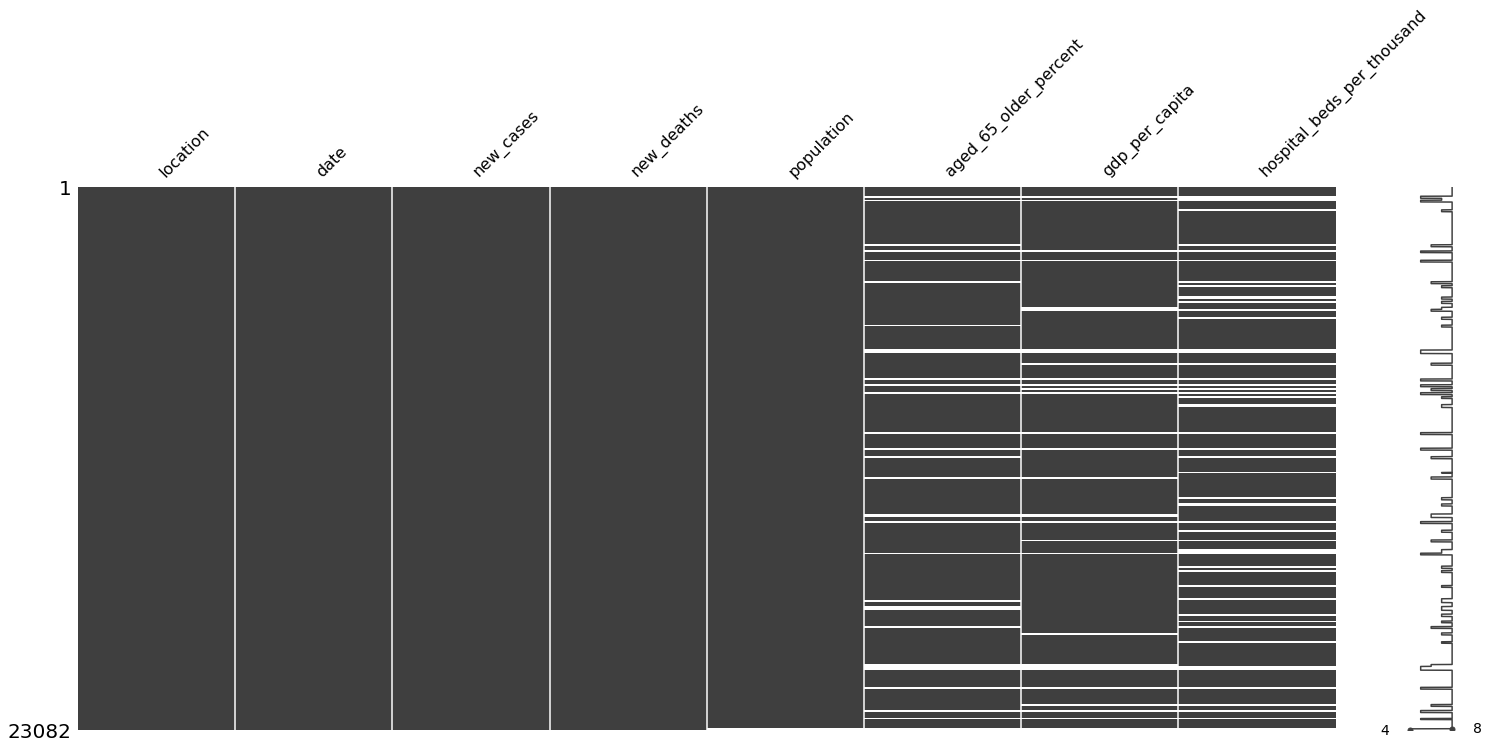

In [92]:
msno.matrix (T3)

**When did the diff in total number of confired cases between italy and germany become more than 10000**

In [347]:
IT_cases = T3[T3['location'] == 'Italy']
IT_cases


,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
10688,Italy,2019-12-31,0,0,60461828.0,23.021,35220.084,3.18
10689,Italy,2020-01-01,0,0,60461828.0,23.021,35220.084,3.18
10690,Italy,2020-01-02,0,0,60461828.0,23.021,35220.084,3.18
10691,Italy,2020-01-03,0,0,60461828.0,23.021,35220.084,3.18
10692,Italy,2020-01-04,0,0,60461828.0,23.021,35220.084,3.18
...,...,...,...,...,...,...,...,...
10846,Italy,2020-06-06,518,85,60461828.0,23.021,35220.084,3.18
10847,Italy,2020-06-07,270,72,60461828.0,23.021,35220.084,3.18
10848,Italy,2020-06-08,197,53,60461828.0,23.021,35220.084,3.18
10849,Italy,2020-06-09,280,65,60461828.0,23.021,35220.084,3.18


In [378]:
GY_cases = T3[T3['location'] == 'Germany']

In [379]:
#cumulative no of cases for each country per day ( asin total cases of 12-31-2019 and 01-01-2020 and so on)
IT_cases['total_cases'] = IT_cases['new_cases'].cumsum()
GY_cases['total_cases'] = GY_cases['new_cases'].cumsum()

#merge italy and gy df based on dates

merged_cases = pd.merge(IT_cases[['date','total_cases']],GY_cases[['date','total_cases']], on ='date', suffixes = ('_italy', '_germany'))
#use suffixes to diff both total cases with _italy and _germany

In [365]:
merged_cases

,date,total_cases_italy,total_cases_germany
0,2019-12-31,0,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,0,0
4,2020-01-04,0,0
...,...,...,...
158,2020-06-06,234531,183678
159,2020-06-07,234801,183979
160,2020-06-08,234998,184193
161,2020-06-09,235278,184543


In [380]:
#find the date when the diff in cumm cases btwn the 2  countries exceed 10,000cases
merged_cases ['diff'] = merged_cases['total_cases_italy']- merged_cases['total_cases_germany']

merged_cases

,date,total_cases_italy,total_cases_germany,diff
0,2019-12-31,0,0,0
1,2020-01-01,0,0,0
2,2020-01-02,0,0,0
3,2020-01-03,0,0,0
4,2020-01-04,0,0,0
...,...,...,...,...
158,2020-06-06,234531,183678,50853
159,2020-06-07,234801,183979,50822
160,2020-06-08,234998,184193,50805
161,2020-06-09,235278,184543,50735


In [ ]:
#lets check the date where diff is >10000

In [381]:
merged_cases[merged_cases ['diff'] > 10000] [['date', 'diff']]

,date,diff
72,2020-03-12,10895
73,2020-03-13,12744
74,2020-03-14,14598
75,2020-03-15,17362
76,2020-03-16,19142
...,...,...
158,2020-06-06,50853
159,2020-06-07,50822
160,2020-06-08,50805
161,2020-06-09,50735


In [ ]:
#lets see if row 71 is actully less than 10000

In [375]:
merged_cases.loc [71]

date                   2020-03-11 00:00:00
total_cases_italy                    10149
total_cases_germany                   1296
diff                                  8853
Name: 71, dtype: object

In [382]:
print (merged_cases.loc [72]) 



date                   2020-03-12 00:00:00
total_cases_italy                    12462
total_cases_germany                   1567
diff                                 10895
Name: 72, dtype: object


** ANSWER IS 2020-03-12 WITH 10,895 CASES**

**Which countyr has the 3rd higest death rate, death rate = sum of deaths per country /mean pop per country * 1million**

In [383]:
T3

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN


In [440]:
Country_totalDR = T3.groupby ('location').agg({'new_deaths':'sum','population':'mean','aged_65_older_percent':'first'}) 
Country_totalDR ['death_rate']= Country_totalDR['new_deaths'] / Country_totalDR['population'] * 1000000
Country_totalDR.sort_values(by ='death_rate', ascending =False)

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
San Marino,42,33938.0,NaN,1237.550828
Belgium,9619,11589616.0,18.571,829.967102
Andorra,51,77265.0,NaN,660.066007
United Kingdom,40883,67886004.0,18.517,602.230174
Spain,27136,46754783.0,19.436,580.389818
...,...,...,...,...
French Polynesia,0,280904.0,7.775,0.000000
Fiji,0,896444.0,6.224,0.000000
Mongolia,0,3278292.0,4.031,0.000000


**What is the F1 score of the following statement: Countries, where more than 20% of the population is over 65 years old, have death rates over 50 per million inhabitants. Ignore countries, where any of the neccessary information is missing!**

In [443]:
#to drp countries with no info
country_death_rate_dropna_df = Country_totalDR.dropna()
country_death_rate_dropna_df 

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
Afghanistan,384,3.892834e+07,2.581,9.864279
Albania,34,2.877800e+06,13.188,11.814581
Algeria,724,4.385104e+07,6.211,16.510440
Angola,4,3.286627e+07,2.405,0.121705
Antigua and Barbuda,3,9.792800e+04,6.933,30.634752
...,...,...,...,...
Vietnam,0,9.733858e+07,7.150,0.000000
World,411195,7.794799e+09,8.696,52.752485
Yemen,127,2.982597e+07,2.922,4.258034


In [444]:
country_aged_65_over_20_percent = country_death_rate_dropna_df[country_death_rate_dropna_df.aged_65_older_percent > 20]
country_aged_65_over_20_percent

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
Bulgaria,167,6948445.0,20.801,24.034154
Finland,324,5540718.0,21.228,58.476176
Germany,8729,83783945.0,21.453,104.184638
Greece,183,10423056.0,20.396,17.557231
Italy,34043,60461828.0,23.021,563.049467
Japan,919,126476458.0,27.049,7.266174
Portugal,1492,10196707.0,21.502,146.321749


In [445]:
country_aged_65_over_20_percent_death_rate_over_50_per_million = country_aged_65_over_20_percent[country_aged_65_over_20_percent.death_rate > 50]
country_aged_65_over_20_percent_death_rate_over_50_per_million

,new_deaths,population,aged_65_older_percent,death_rate
location,,,,
Finland,324,5540718.0,21.228,58.476176
Germany,8729,83783945.0,21.453,104.184638
Italy,34043,60461828.0,23.021,563.049467
Portugal,1492,10196707.0,21.502,146.321749


In [446]:
from sklearn.metrics import f1_score
y_pred = [1] * len(country_aged_65_over_20_percent)
y_true = [1] * len(country_aged_65_over_20_percent_death_rate_over_50_per_million) + [0] * (len(country_aged_65_over_20_percent) - len(country_aged_65_over_20_percent_death_rate_over_50_per_million))
f1_score(y_true, y_pred)

0.7272727272727273

What is the probability that a country has GDP over $10000, if we known that they have at least 5 hospital beds per 1000 inhabitants.

In [ ]:
#  .agg('mean'), .mean(), .agg('first) all mean same
#when you have multiple repeated values you can ask for the mean or just the first value

In [469]:
gdp_beds_by_country_df = T3.groupby('location') [['gdp_per_capita', 'hospital_beds_per_thousand']].mean().dropna()
gdp_beds_by_country_df

,gdp_per_capita,hospital_beds_per_thousand
location,,
Afghanistan,1803.987,0.500
Albania,11803.431,2.890
Algeria,13913.839,1.900
Antigua and Barbuda,21490.943,3.800
Argentina,18933.907,5.000
...,...,...
Vietnam,6171.884,2.600
World,15469.207,2.705
Yemen,1479.147,0.700


In [468]:
gdp_beds_by_country_df = T3.groupby('location') [['gdp_per_capita', 'hospital_beds_per_thousand']].agg('first').dropna()
gdp_beds_by_country_df

,gdp_per_capita,hospital_beds_per_thousand
location,,
Afghanistan,1803.987,0.500
Albania,11803.431,2.890
Algeria,13913.839,1.900
Antigua and Barbuda,21490.943,3.800
Argentina,18933.907,5.000
...,...,...
Vietnam,6171.884,2.600
World,15469.207,2.705
Yemen,1479.147,0.700


In [472]:
country_at_least_5_beds_per_thousand_hospitals = gdp_beds_by_country_df[gdp_beds_by_country_df.hospital_beds_per_thousand >= 5]
country_at_least_5_beds_per_thousand_hospitals. head(15)

,gdp_per_capita,hospital_beds_per_thousand
location,,
Argentina,18933.907,5.000
Austria,45436.686,7.370
Barbados,16978.068,5.800
Belarus,17167.967,11.000
Belgium,42658.576,5.640
Bulgaria,18563.307,7.454
Croatia,22669.797,5.540
Czech Republic,32605.906,6.630
France,38605.671,5.980


In [473]:
country_at_least_5_beds_gdp_over_10000 = country_at_least_5_beds_per_thousand_hospitals[country_at_least_5_beds_per_thousand_hospitals.gdp_per_capita > 10000]

# probability = country_at_least_5_beds_per_thousand_hospitals
len(country_at_least_5_beds_gdp_over_10000)/len(country_at_least_5_beds_per_thousand_hospitals)

0.8846153846153846